In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

$$ v_{n+1} = v_n + v_n'dt $$

$$ x_{n+1} = x_n + v_{n+1}dt $$

# Spring Problem

From the equation `x'' = -k/m*x`; `x' = -Awcos(wt)` and `x(0) = x0`

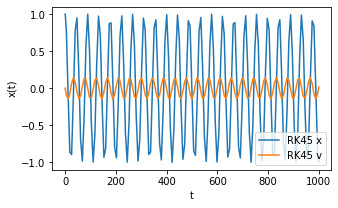

In [2]:
# The derivatives functions
def spring(t,curr):
    x, v = curr
    return v, -k/m*x
# Initial conditions
k=0.1
m=5
x0 = 1
v0 = 0
w = np.sqrt(k/m)
t0 = 0
T = 50
N = 100
h = (T-t0)/N
initv = [x0,v0]
# Solving using Solve_IVP
sol1 = solve_ivp(spring, [0, 1000], initv, method='RK45')
# Plotting
f = plt.figure(figsize=(5,3))
plt.plot(sol1.t,sol1.y[0], label='RK45 x')
plt.plot(sol1.t,sol1.y[1], label='RK45 v')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()

## Simple Harmonic Oscillator; Different Euler's Method

`x'' = -k/m*x` with solution known as `Acos(wt + phi)`

### Functions to make things easy

In [3]:
def SHO(x,v):
    dxdt = v
    dvdt = -k/m*x
    return dxdt, dvdt

def SHO_solution(time):
    w = np.sqrt(k/m)
    b = v0/w
    A = np.sqrt(x0**2 + v0**2/w**2)
    phi = np.arctan(-v0/(w*x0))
    
    return A*np.cos(w*time + phi), -A*w*np.sin(w*time + phi)
    #return x0*np.cos(w*time) + b*np.sin(w*time), -w*x0*np.sin(w*time) + w*b*np.cos(w*time)

In [4]:
def pe(x):
    return 1/2 * k*x**2
def ke(v):
    return 1/2 * m*v**2

def e(x,v):
    return pe(x) +ke(v)

In [5]:
def FBC(x0, v0, time):
    # Forward-Euler
    x_listF = [x0]
    v_listF = [v0]
    for t in time:
        dxdt, dvdt = SHO(x_listF[-1], v_listF[-1])
        v_1 = v_listF[-1] + h*dvdt
        x_1 = x_listF[-1] + h*dxdt
        x_listF.append(x_1)
        v_listF.append(v_1)
    
    # Backward-Euler
    x_listB = [x0]
    v_listB = [v0]
    for t in time:
        dxdt, dvdt = SHO(x_listB[-1], v_listB[-1])
    
        x_1 = (x_listB[-1] + h*v_listB[-1])/(1 + h**2*k/m)
        v_1 = v_listB[-1] + h*(-k/m*x_1)
    
        x_listB.append(x_1)
        v_listB.append(v_1)
    
    # Eueler-Cromer
    x_listC = [x0]
    v_listC = [v0]
    for t in time:
        dxdt, dvdt = SHO(x_listC[-1], v_listC[-1])
        v_1 = v_listC[-1] + h*dvdt
        x_1 = x_listC[-1] + h*v_1
        x_listC.append(x_1)
        v_listC.append(v_1)
        
    solx, solv = SHO_solution(time)
    
    return np.array([x_listF, v_listF]), np.array([x_listB, v_listB]), np.array([x_listC, v_listC]), np.array([solx,solv])

#### With same initial conditions and constants

In [6]:
k=0.1
m=5
x0 = 1
v0 = 0
w = np.sqrt(k/m)

t0 = 0
T = 50
N = 100
h = (T-t0)/N
time = np.arange(t0, T+1, h)

In [7]:
forward, backward, cromer, sol = FBC(x0, v0, time)
# Unpack
fx, fv = forward
bx, bv = backward
cx, cv = cromer
sx, sv = sol
# Energy
fe = e(fx, fv)
be = e(bx, bv)
ce = e(cx, cv)
se = e(sx, sv)

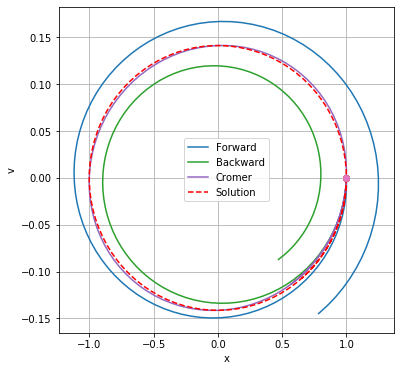

In [8]:
plt.figure(figsize=(6,6))
# Forward
plt.plot(fx, fv, label='Forward')
plt.plot(fx[0], fv[0], 'o')
# Backward
plt.plot(bx, bv, label='Backward')
plt.plot(bx[0], bv[0], 'o')
# Cromer
plt.plot(cx, cv, label='Cromer')
plt.plot(cx[0], cv[0], 'o')
# Solution
plt.plot(sx, sv, 'r--', label='Solution')
plt.plot(sx[0], sv[0], 'o')
plt.legend()
plt.xlabel('x')
plt.ylabel('v')
plt.grid()

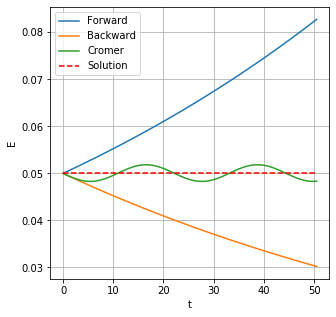

In [9]:
plt.figure(figsize=(5,5))
# Forward
plt.plot(time, fe[:-1], label='Forward')
# Backward
plt.plot(time, be[:-1], label='Backward')
# Cromer
plt.plot(time, ce[:-1], label='Cromer')
# Solution
plt.plot(time, se, 'r--', label='Solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('E')
plt.grid()

### Small timesteps

In [10]:
t0 = 0
T = 50
N = 1000
h = (T-t0)/N
time = np.arange(t0, T+1, h)
# Solve
forward, backward, cromer, sol = FBC(x0, v0, time)
# Unpack
fx, fv = forward
bx, bv = backward
cx, cv = cromer
sx, sv = sol
# Energy
fe = e(fx, fv)
be = e(bx, bv)
ce = e(cx, cv)
se = e(sx, sv)

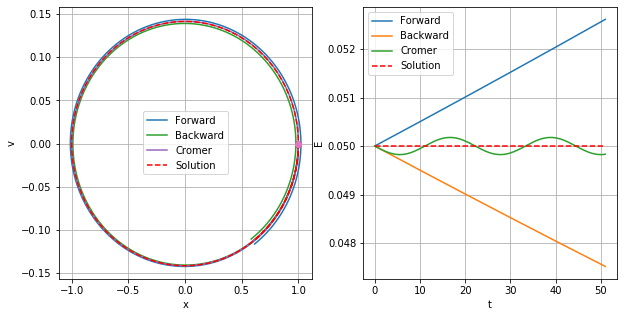

In [11]:
f = plt.figure(figsize=(10,5))

f.add_subplot(121)
# Forward
plt.plot(fx, fv, label='Forward')
plt.plot(fx[0], fv[0], 'o')
# Backward
plt.plot(bx, bv, label='Backward')
plt.plot(bx[0], bv[0], 'o')
# Cromer
plt.plot(cx, cv, label='Cromer')
plt.plot(cx[0], cv[0], 'o')
# Solution
plt.plot(sx, sv, 'r--', label='Solution')
plt.plot(sx[0], sv[0], 'o')
plt.legend()
plt.xlabel('x')
plt.ylabel('v')
plt.grid()

f.add_subplot(122)
# Forward
plt.plot(time, fe[:-1], label='Forward')
# Backward
plt.plot(time, be[:-1], label='Backward')
# Cromer
plt.plot(time, ce[:-1], label='Cromer')
# Solution
plt.plot(time, se, 'r--', label='Solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('E')
plt.grid()

In [12]:
aveCE = np.average(ce)
aveSE = np.average(se)
print('Average E Euler-Cromer:', aveCE)
print('Average E Solution:', aveSE)
print('Difference:', abs(aveCE-aveSE))

Average E Euler-Cromer: 0.049984782019926954
Average E Solution: 0.05000000000000001
Difference: 1.521798007305536e-05


### Big timesteps

In [13]:
t0 = 0
T = 50
N = 15
h = (T-t0)/N
time = np.arange(t0, T+1, h)
# Solve
forward, backward, cromer, sol = FBC(x0, v0, time)
# Unpack
fx, fv = forward
bx, bv = backward
cx, cv = cromer
sx, sv = sol
# Energy
fe = e(fx, fv)
be = e(bx, bv)
ce = e(cx, cv)
se = e(sx, sv)

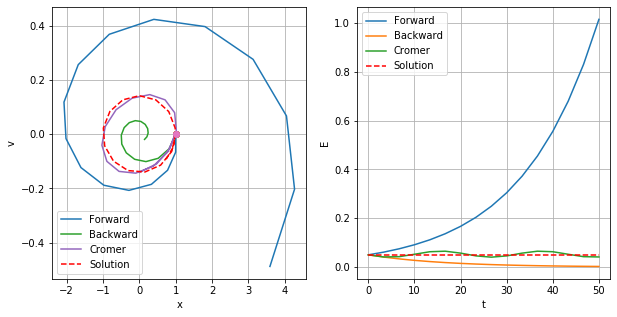

In [14]:
f = plt.figure(figsize=(10,5))

f.add_subplot(121)
# Forward
plt.plot(fx, fv, label='Forward')
plt.plot(fx[0], fv[0], 'o')
# Backward
plt.plot(bx, bv, label='Backward')
plt.plot(bx[0], bv[0], 'o')
# Cromer
plt.plot(cx, cv, label='Cromer')
plt.plot(cx[0], cv[0], 'o')
# Solution
plt.plot(sx, sv, 'r--', label='Solution')
plt.plot(sx[0], sv[0], 'o')
plt.legend()
plt.xlabel('x')
plt.ylabel('v')
plt.grid()

f.add_subplot(122)
# Forward
plt.plot(time, fe[:-1], label='Forward')
# Backward
plt.plot(time, be[:-1], label='Backward')
# Cromer
plt.plot(time, ce[:-1], label='Cromer')
# Solution
plt.plot(time, se, 'r--', label='Solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('E')
plt.grid()

In [15]:
aveCE = np.average(ce)
aveSE = np.average(se)
print('Average E Euler-Cromer:', aveCE)
print('Average E Solution:', aveSE)
print('Difference:', abs(aveCE-aveSE))

Average E Euler-Cromer: 0.051383362019727534
Average E Solution: 0.05
Difference: 0.0013833620197275312
